In [4]:
'''
scikit-learn公式データセットを使用してボストンの地価価格を予想するプログラムを作成する
教師あり学習を行い、回帰分析をする
教師データ:テストデータを7:3にして学習を行い、結果を出力
元価格との差を求める
'''

from sklearn.datasets import load_boston
import pandas as pd 

datas=load_boston()
dir(datas)

boston_dataframe=pd.DataFrame(datas.data)
boston_dataframe.columns=datas.feature_names
boston_dataframe['price']=datas.target
print(boston_dataframe.head)


<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98   24

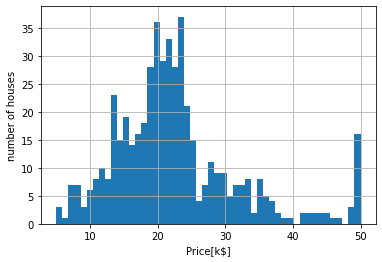

In [5]:
import matplotlib.pyplot as plt 
plt.hist(datas.target,bins=50)
plt.xlabel("Price[k$]")
plt.ylabel("number of houses")
plt.grid()

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#平均部屋数を変数X,住宅価格を変数yに保存
x=boston_dataframe.drop('price',axis=1)
y=boston_dataframe["price"]

In [22]:
#データを訓練用とテスト用(7:3)に分割
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
#モデル学習
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
# 平均二乗誤差による予測精度算出
from sklearn.metrics import mean_squared_error
y_test_pred = model.predict(x_test) #テストデータを用いて目的変数を予測
y_train_pred = model.predict(x_train) #学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(y_train, y_train_pred))
print('MSE test data: ', mean_squared_error(y_test, y_test_pred))

MSE train data:  19.958219814238046
MSE test data:  27.195965766883294


In [25]:
# 決定係数による予測精度算出
from sklearn.metrics import r2_score
print('r^2 train data: ', r2_score(y_train, y_train_pred))
print('r^2 test data: ', r2_score(y_test, y_test_pred))

r^2 train data:  0.7645451026942549
r^2 test data:  0.6733825506400185


In [31]:
#print([x for x in list(zip(y_test,y_test_pred))])
print(y_test)
print(y_test_pred)

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
4      36.2
428    11.0
385     7.2
308    22.8
5      28.7
Name: price, Length: 152, dtype: float64
[24.9357079  23.75163164 29.32638296 11.97534566 21.37272478 19.19148525
 20.5717479  21.21154015 19.04572003 20.35463238  5.44119126 16.93688709
 17.15482272  5.3928209  40.20270696 32.31327348 22.46213268 36.50124666
 31.03737014 23.17124551 24.74815321 24.49939403 20.6595791  30.4547583
 22.32487164 10.18932894 17.44286422 18.26103077 35.63299326 20.81960303
 18.27218007 17.72047628 19.33772473 23.62254823 28.97766856 19.45036239
 11.13170639 24.81843595 18.05294835 15.59712226 26.21043403 20.81140432
 22.17349382 15.48367365 22.62261604 24.88561528 19.74754478 23.0465628
  9.84579105 24.36378793 21.47849008 17.62118176 24.39160873 29.95102691
 13.57219422 21.53645439 20.53306273 15.03433182 14.3232289  22.11929299
 17.07321915 21.54141094 32.96766968 31.371599   17.7860591  32.75069556
 18.74795323 19.21428022 1